In [1]:
!pip install tensorflow==1.4.0

     |████████████████████████████████| 41.2MB 105kB/s 
     |████████████████████████████████| 1.7MB 43.7MB/s 
     |████████████████████████████████| 890kB 37.7MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107222 sha256=5b214df7b14165570c8a6f6dd521bc367ea5f3d105771bd807c87b53134f5c6a
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.3.0
    Uninstalling bleach-3.3.0:
      Successfully uninstalled bleach-3.3.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [3]:
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 1.4.0


In [4]:
data = pd.read_csv("/content/iris_training.csv", header = None)

In [5]:
data

,0,1,2,3,4
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


#Data PreProcessing

In [6]:
#Count number of data examples for each class
print(data[4].value_counts())

2    42
0    42
1    36
Name: 4, dtype: int64


This implies that data is not biased !

In [7]:
#Count number of null/nan values
print(data.isnull().sum())

0    0
1    0
2    0
3    0
4    0
dtype: int64


In [8]:
#Check shape of data
print(data.shape)

(120, 5)


In [9]:
#Check if data is skewed in both axis by finding min and max skew value
print("Axis 0 max value : ",data.skew(axis=0).max())
print("Axis 0 min value : ",data.skew(axis=0).min())
print("Axis 1 max value : ",data.skew(axis=1).max())
print("Axis 1 min value : ",data.skew(axis=1).min())

Axis 0 max value :  0.3498645561351858
Axis 0 min value :  -0.2159872553574826
Axis 1 max value :  1.0582650248013026
Axis 1 min value :  0.1494818718327736


In [10]:
data

,0,1,2,3,4
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


In [11]:
#One Hot Encoding
enc = OneHotEncoder() 
enc_df = pd.DataFrame(enc.fit_transform(data[[4]]).toarray(),columns=['4','5','6'])
data = data.iloc[:,:4].join(enc_df)
data

,0,1,2,3,4,5,6
0,6.4,2.8,5.6,2.2,0.0,0.0,1.0
1,5.0,2.3,3.3,1.0,0.0,1.0,0.0
2,4.9,2.5,4.5,1.7,0.0,0.0,1.0
3,4.9,3.1,1.5,0.1,1.0,0.0,0.0
4,5.7,3.8,1.7,0.3,1.0,0.0,0.0
...,...,...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,0.0,1.0,0.0
116,5.7,3.0,4.2,1.2,0.0,1.0,0.0
117,4.4,2.9,1.4,0.2,1.0,0.0,0.0
118,4.8,3.0,1.4,0.1,1.0,0.0,0.0


#Spliting Dataset

In [12]:
#Separating labels from feature columns
X = data.iloc[:,:4]
Y = data.iloc[:,4:]

In [13]:
#Spliting into test - train data
x_train ,x_test, y_train, y_test = train_test_split(X,Y,train_size=0.8)
print("Shape of x_train and x_test : ", x_train.shape, x_test.shape)
print("Shape of y_train and y_test : ", y_train.shape, y_test.shape)

Shape of x_train and x_test :  (96, 4) (24, 4)
Shape of y_train and y_test :  (96, 3) (24, 3)


#Model

In [14]:
#Number of features are 4
nfeat = 4

#Lets assign variables to number of neurons in the 3 hidden layers
n1 = 5
n2 = 10
n3 = 5

In [15]:
#Setting up Placeholders and variables. Input has 4 features and output has 3 classes
x = tf.placeholder(tf.float32,shape=[None,4])
y_ = tf.placeholder(tf.float32,shape=[None, 3])

#Setting up weight and bias
W1 = tf.Variable(tf.random_normal([nfeat,n1], stddev=(1/tf.sqrt(float(nfeat)))))
b1 = tf.Variable(tf.random_normal([n1]))

W2 = tf.Variable(tf.random_normal([n1,n2], stddev=(1/tf.sqrt(float(n1)))))
b2 = tf.Variable(tf.random_normal([n2]))

W3 = tf.Variable(tf.random_normal([n2,n3], stddev=(1/tf.sqrt(float(n2)))))
b3 = tf.Variable(tf.random_normal([n3]))

W4 = tf.Variable(tf.random_normal([n3,3], stddev=(1/tf.sqrt(float(n3)))))
b4 =  tf.Variable(tf.random_normal([3]))

In [16]:
#Lets add activation function to all hidden layers as ReLU and softmax function for last output layer and make nn graph
hidden_out_1 = tf.nn.relu(tf.matmul(x,W1)+b1)
hidden_out_2 = tf.nn.relu(tf.matmul(hidden_out_1,W2)+b2)
hidden_out_3 = tf.nn.relu(tf.matmul(hidden_out_2,W3)+b3)
y = tf.nn.softmax(tf.matmul(hidden_out_3,W4) + b4)

In [17]:
#calculating accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
#Using entropy as Cost Function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [19]:
#Adam Optimizer
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)

In [20]:
#Session initialization
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

#number of interations
epochs=100

1.278129
0.23781775


Text(0, 0.5, 'Loss')

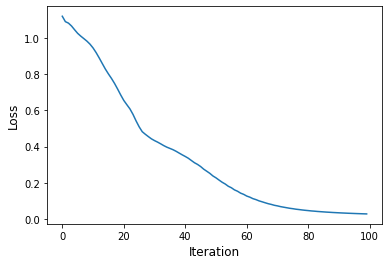

In [21]:
loss_plot = []
for i in range(epochs):
    _, l = sess.run([train_step,cross_entropy], feed_dict={x: x_train, y_:y_train})
    loss_plot.append(sess.run(cross_entropy, feed_dict={x: x_train, y_: y_train}))
    weights1 = sess.run(W1)
    weights2 = sess.run(W2)
    weights3 = sess.run(W3)
    weights4 = sess.run(W4)
    if i%50==0 :
      print(l)

plt.plot(range(epochs), loss_plot)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)

In [22]:
print('Accuracy : ', sess.run(accuracy, feed_dict={x: x_test, y_: y_test}))

Accuracy :  0.9166667


In [23]:
x_test.shape, y_test.shape

((24, 4), (24, 3))

In [24]:
#read file
test_df = pd.read_csv("/content/iris_test.csv", header=None)
test_feat = test_df.iloc[:,:-1]
test_label = test_df.iloc[:,-1:]
test_label = pd.DataFrame(enc.fit_transform(test_label).toarray())

In [25]:
test_acc = []
def test_accuracy():
  for i in range(10):
    acc = sess.run(accuracy, feed_dict={x: test_feat, y_: test_label}) 
    test_acc.append(acc)
    print(acc)
  mean = np.mean(test_acc)
  std = np.std(test_acc)
  print("Final Mean", mean)
  print("Final Standard Deviation", std)

In [26]:
test_accuracy()

0.96666664
0.96666664
0.96666664
0.96666664
0.96666664
0.96666664
0.96666664
0.96666664
0.96666664
0.96666664
Final Mean 0.9666666
Final Standard Deviation 5.9604645e-08
